<a href="https://colab.research.google.com/github/harshsaini1129/Data-Science/blob/main/LINEAR_REGRESSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv('/content/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


PREDICTING THE PROFIT


In [ ]:
# first check if null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# DIVIDE DATA INTO X AND Y VARIABLES
#x =df.drop('Profit',axis =1).values    // axis =0 => droping row
#y =df['Profit'].values or

x =df.iloc[:,:-1].values  # select all rows ,columns except last column
y =df.iloc[:,-1].values  # select all the rows and last column only




In [ ]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
# categorical data is problem
# so do feature encoding
# again data is not in proper range  so do feature scaling

In [ ]:
# Feature encoding one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# here 3rd column is categorical so pass [3]
ct =ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])],remainder='passthrough')
x =np.array(ct.fit_transform(x))


In [ ]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
# TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)



In [ ]:
len(x_train)

40

In [ ]:
len(x_test)

10

In [ ]:
y_train

array([ 89949.14,  71498.49,  81005.76, 101004.64, 155752.6 , 103282.38,
       156122.51,  96778.92,  69758.98, 105008.31, 111313.02,  90708.19,
       144259.4 ,  78239.91, 108552.04, 124266.9 , 118474.03, 110352.25,
        14681.4 , 129917.04,  81229.06, 107404.34, 126992.93, 108733.99,
        49490.75, 166187.94,  42559.73,  96479.51,  65200.33,  99937.59,
       182901.99, 132602.65,  77798.83, 149759.96,  97483.56, 125370.37,
       192261.83, 134307.35,  64926.08, 146121.95])

In [ ]:
y_test

array([ 96712.8 , 105733.54, 191050.39,  97427.84, 141585.52, 156991.12,
       122776.86, 152211.77, 191792.06,  35673.41])

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)


In [ ]:
# create LR model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prediction
y_pred =regressor.predict(x_test)

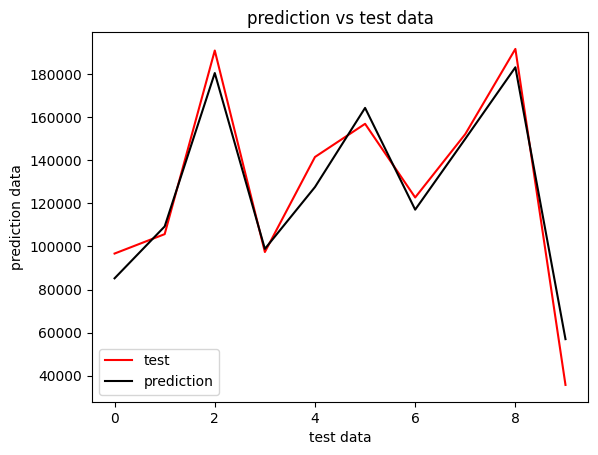

In [ ]:
plt.plot(y_test,color ='red', label='test')
plt.plot(y_pred,color ='black',label ='prediction')
plt.title('prediction vs test data')
plt.xlabel('test data')
plt.ylabel('prediction data')
plt.legend()
plt.show()
# Model is Ready

In [ ]:
# Now out of box prediction
data =[[1.0,0.0,0.0,80000,125000,250000]]
new_df =pd.DataFrame(data)

In [ ]:
#Use fit_transform() when you want to both learn the scaling parameters and apply them immediately, typically on your training data.
#Use transform() when you want to apply already learned scaling parameters to new data, such as your test set or new unseen data.



In [ ]:
new_df =sc.transform(new_df)

In [ ]:
print(new_df)

[[ 1.36277029 -0.69388867 -0.69388867  0.25772194  0.18637938  0.36767592]]


In [ ]:
single =regressor.predict(new_df)
print(single)

[115882.99692236]
